**STEP1**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import random

In [ ]:
#import  data
df=pd.read_excel('/content/extention of Z-Alizadeh sani dataset.xlsx')

In [ ]:
#summary statisical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [ ]:
#show first 5 values
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,39,52,261,50,0,N,Stenotic,Normal,Stenotic,CAD
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,38,55,165,40,4,N,Stenotic,Stenotic,Normal,CAD
2,54,54,164,Male,20.077335,0,0,1,0,0,...,38,60,230,40,2,mild,Stenotic,Normal,Normal,CAD
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,18,72,742,55,0,Severe,Normal,Normal,Normal,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,55,39,274,50,0,Severe,Normal,Normal,Normal,Normal


**STEP2** Normalizing Values

In [ ]:
!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

In [ ]:
#normalize the specific columns
z_normalize_features=['Age','BP','BMI','LDL']

In [ ]:
#normalize btw 0 and 1
df[z_normalize_features]=MinMaxScaler().fit_transform(df[z_normalize_features])

In [ ]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath,Fit_Score
0,0.410714,90,175,Male,0.494721,0,1,1,0,0,...,52,0.329149,0.777778,0,N,Stenotic,Normal,Stenotic,CAD,0.434966
1,0.660714,70,157,Fmale,0.451314,0,1,0,0,0,...,55,0.195258,0.555556,4,N,Stenotic,Stenotic,Normal,CAD,0.461468
2,0.428571,54,164,Male,0.086105,0,0,1,0,0,...,60,0.285914,0.555556,2,mild,Stenotic,Normal,Normal,CAD,0.189779
3,0.642857,67,158,Fmale,0.382846,0,1,0,0,0,...,72,1.000000,0.888889,0,Severe,Normal,Normal,Normal,Normal,0.326097
4,0.357143,87,153,Fmale,0.836058,0,1,0,0,0,...,39,0.347280,0.777778,0,Severe,Normal,Normal,Normal,Normal,0.383395


**STEP 3**

In [ ]:
#giving fitness score according to complete 100%
def fitness(row):
    factors = [
        row['Age'] * 0.25,
        row['BP'] * 0.25,
        row['BMI'] * 0.20,
        row['LDL'] * 0.20,
         row['HDL'] * 0.10
    ]
    score = sum(factors)
    return score

In [ ]:
df['Fit_Score'] = df.apply(fitness, axis=1)

In [ ]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath,Fit_Score
0,0.410714,90,175,Male,0.494721,0,1,1,0,0,...,52,0.329149,0.777778,0,N,Stenotic,Normal,Stenotic,CAD,0.394487
1,0.660714,70,157,Fmale,0.451314,0,1,0,0,0,...,55,0.195258,0.555556,4,N,Stenotic,Stenotic,Normal,CAD,0.497839
2,0.428571,54,164,Male,0.086105,0,0,1,0,0,...,60,0.285914,0.555556,2,mild,Stenotic,Normal,Normal,CAD,0.228561
3,0.642857,67,158,Fmale,0.382846,0,1,0,0,0,...,72,1.000000,0.888889,0,Severe,Normal,Normal,Normal,Normal,0.308535
4,0.357143,87,153,Fmale,0.836058,0,1,0,0,0,...,39,0.347280,0.777778,0,Severe,Normal,Normal,Normal,Normal,0.428336


**STEP4**

In [ ]:
#rolette selection according to fitness score
def roulette_selection(df, num_selected):
#finding total fitness
    total_fitness = df['Fit_Score'].sum()

    selection_probs = df['Fit_Score'] / total_fitness

    selected_patients = df.sample(n=num_selected, weights=selection_probs)

    selected_dict = selected_patients[['Fit_Score']].to_dict()['Fit_Score']

    return selected_dict

In [ ]:
selected_patients = roulette_selection(df, 10)

In [ ]:
selected_patients

{126: 0.4122832260539772,
 242: 0.3550359864290586,
 57: 0.46508743666446895,
 232: 0.3969356092034384,
 101: 0.5848547319087524,
 66: 0.4320577938728794,
 112: 0.43963496985752465,
 228: 0.48556057798940183,
 22: 0.4836941609740288,
 211: 0.4109888440577752}

In [ ]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath,Fit_Score
0,0.410714,90,175,Male,0.494721,0,1,1,0,0,...,52,0.329149,0.777778,0,N,Stenotic,Normal,Stenotic,CAD,0.394487
1,0.660714,70,157,Fmale,0.451314,0,1,0,0,0,...,55,0.195258,0.555556,4,N,Stenotic,Stenotic,Normal,CAD,0.497839
2,0.428571,54,164,Male,0.086105,0,0,1,0,0,...,60,0.285914,0.555556,2,mild,Stenotic,Normal,Normal,CAD,0.228561
3,0.642857,67,158,Fmale,0.382846,0,1,0,0,0,...,72,1.000000,0.888889,0,Severe,Normal,Normal,Normal,Normal,0.308535
4,0.357143,87,153,Fmale,0.836058,0,1,0,0,0,...,39,0.347280,0.777778,0,Severe,Normal,Normal,Normal,Normal,0.428336


**STEP5**

In [ ]:
#random selection
def rand_select(df, num_selected):
#it select the random rows from the dataframe
    patients_select = df.sample(n=num_selected)
#convert specific column into dict
    selected_dict = patients_select[['Fit_Score']].to_dict()['Fit_Score']

    return selected_dict

In [ ]:
#random select 10 values
random_selected_patients = rand_select(df, 10)

In [ ]:
roulette_scores = list(selected_patients.values())

random_scores = list(random_selected_patients.values())

In [ ]:
print("Roulette fitness score", roulette_scores)
print("Random fitness score:", random_scores)


Roulette fitness score [0.4122832260539772, 0.3550359864290586, 0.46508743666446895, 0.3969356092034384, 0.5848547319087524, 0.4320577938728794, 0.43963496985752465, 0.48556057798940183, 0.4836941609740288, 0.4109888440577752]
Random fitness score: [0.49516227806727975, 0.5578306764959658, 0.3873998149664061, 0.2769179367761112, 0.5061396780155295, 0.4487229621254414, 0.4305206719741481, 0.23675150132113168, 0.648053035278356, 0.4521526217210218]


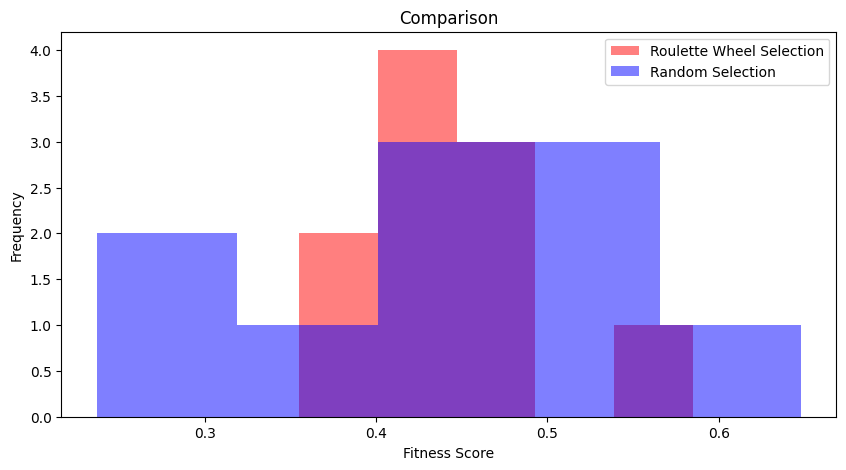

In [ ]:
import matplotlib.pyplot as plt
#select size of figure
plt.figure(figsize=(10,5))
plt.hist(roulette_scores, bins=5, alpha=0.5, label='Roulette Wheel Selection', color='red')
plt.hist(random_scores, bins=5, alpha=0.5, label='Random Selection', color='blue')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison')
plt.show()
